# Exchange-traded funds (ETFs)

https://www.fool.com/investing/etf/2017/07/31/what-types-of-etfs-are-best-for-you.aspx  

Broad-market ETFs  
Sector ETFs  
Dividend ETFs  
Style-based ETFs  
Commodity ETFs  
Currency ETFs  
Bond ETFs  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['SPY','FIHBX','FBTAX','DBC']
start = '2014-01-01'
end = '2019-01-01'

# Read data 
dataset = yf.download(symbols,start,end)['Adj Close']

# View Columns
dataset.head()

[*********************100%***********************]  4 of 4 downloaded


,DBC,FBTAX,FIHBX,SPY
Date,,,,
2014-01-02,24.965725,17.185766,7.243507,163.383347
2014-01-03,24.807775,17.104101,7.250597,163.356522
2014-01-06,24.837391,16.886332,7.250597,162.883148
2014-01-07,24.817648,17.158545,7.264789,163.883560
2014-01-08,24.580725,17.485201,7.264789,163.919250


In [3]:
dataset.tail()

,DBC,FBTAX,FIHBX,SPY
Date,,,,
2018-12-24,14.39,21.690001,8.673551,231.115768
2018-12-26,14.71,23.030001,8.654531,242.792862
2018-12-27,14.57,23.100000,8.664040,244.656876
2018-12-28,14.45,23.100000,8.702084,244.341248
2018-12-31,14.49,23.600000,8.758496,246.481415


### Starting Cash with 100k to invest in ETFs

In [4]:
Cash = 100000
print('Percentage of invest:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x in zip(dataset.columns, percent_invest):
    cost = x * Cash
    print('{}: {}'.format(i, cost))

Percentage of invest:
DBC: 25000.0
FBTAX: 25000.0
FIHBX: 25000.0
SPY: 25000.0


In [5]:
print('Number of Shares:')
for i, x in zip(dataset.columns, dataset.iloc[0]):
    shares = int(cost/x)
    print('{}: {}'.format(i, shares))

Number of Shares:
DBC: 1001
FBTAX: 1454
FIHBX: 3451
SPY: 153


In [6]:
print('Beginning Value:')
for i, x in zip(dataset.columns, dataset.iloc[0]):
    shares = int(cost/x)
    Begin_Value = round(shares * x, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
DBC: $24990.69
FBTAX: $24988.1
FIHBX: $24997.34
SPY: $24997.65


In [7]:
print('Current Value:')
for i, x, y in zip(dataset.columns, dataset.iloc[0], dataset.iloc[-1]):
    shares = int(cost/x)
    Begin_Value = round(shares * x, 2)
    Current_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
DBC: $14504.49
FBTAX: $34314.4
FIHBX: $30225.57
SPY: $37711.66


In [8]:
# Calculate Daily Returns
returns = dataset.pct_change()
returns = returns.dropna()

In [9]:
# Calculate mean returns
meanDailyReturns = returns.mean()
print(meanDailyReturns)

DBC     -0.000388
FBTAX    0.000403
FIHBX    0.000155
SPY      0.000362
dtype: float64


In [10]:
# Calculate std returns
stdDailyReturns = returns.std()
print(stdDailyReturns)

DBC      0.009496
FBTAX    0.017337
FIHBX    0.002734
SPY      0.008306
dtype: float64


In [11]:
# Define weights for the portfolio
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [12]:
# Calculate the covariance matrix on daily returns
cov_matrix = (returns.cov())*250
print (cov_matrix)

            DBC     FBTAX     FIHBX       SPY
DBC    0.022544  0.005441  0.001920  0.006348
FBTAX  0.005441  0.075140  0.003101  0.023501
FIHBX  0.001920  0.003101  0.001869  0.002384
SPY    0.006348  0.023501  0.002384  0.017247


In [13]:
# Calculate expected portfolio performance
portReturn = np.sum(meanDailyReturns*weights)

In [14]:
# Print the portfolio return
print(portReturn)

0.00013291503819372617


In [15]:
# Create portfolio returns column
returns['Portfolio'] = returns.dot(weights)

In [16]:
returns.head()

,DBC,FBTAX,FIHBX,SPY,Portfolio
Date,,,,,
2014-01-03,-0.006327,-0.004752,0.000979,-0.000164,-0.002566
2014-01-06,0.001194,-0.012732,0.000000,-0.002898,-0.003609
2014-01-07,-0.000795,0.016120,0.001957,0.006142,0.005856
2014-01-08,-0.009547,0.019038,0.000000,0.000218,0.002427
2014-01-09,-0.008032,0.047743,0.000000,0.000654,0.010091


In [17]:
returns.tail()

,DBC,FBTAX,FIHBX,SPY,Portfolio
Date,,,,,
2018-12-24,-0.011065,-0.010944,-0.003279,-0.026423,-0.012928
2018-12-26,0.022238,0.061780,-0.002193,0.050525,0.033087
2018-12-27,-0.009517,0.003039,0.001099,0.007677,0.000575
2018-12-28,-0.008236,0.000000,0.004391,-0.001290,-0.001284
2018-12-31,0.002768,0.021645,0.006483,0.008759,0.009914


In [18]:
# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()
print(daily_cum_ret.tail())

                 DBC     FBTAX     FIHBX       SPY  Portfolio
Date                                                         
2018-12-24  0.576390  1.262091  1.197424  1.414561   1.098092
2018-12-26  0.589208  1.340063  1.194798  1.486032   1.134425
2018-12-27  0.583600  1.344136  1.196111  1.497441   1.135077
2018-12-28  0.578794  1.344136  1.201363  1.495509   1.133619
2018-12-31  0.580396  1.373229  1.209151  1.508608   1.144858


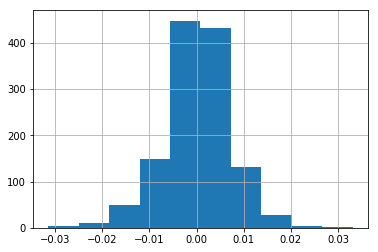

In [19]:
returns['Portfolio'].hist()
plt.show()

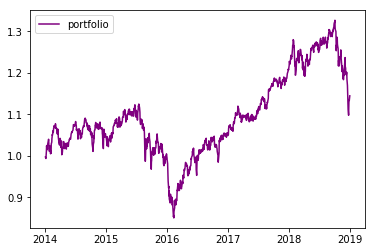

In [20]:
import matplotlib.dates

# Plot the portfolio cumulative returns only
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='purple', label="portfolio")
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.legend()
plt.show()

In [21]:
# Print the mean
print("mean : ", returns['Portfolio'].mean()*100)

# Print the standard deviation
print("Std. dev: ", returns['Portfolio'].std()*100)

# Print the skewness
print("skew: ", returns['Portfolio'].skew())

# Print the kurtosis
print("kurt: ", returns['Portfolio'].kurtosis())

mean :  0.013291503819372604
Std. dev:  0.7109657202623352
skew:  -0.29079386577268956
kurt:  1.8417515718018835


In [22]:
# Calculate the standard deviation by taking the square root
port_standard_dev = np.sqrt(np.dot(weights.T, np.dot(weights, cov_matrix)))

# Print the results 
print(str(np.round(port_standard_dev, 4) * 100) + '%')

11.24%


In [23]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print(str(np.round(port_variance, 4) * 100) + '%')

1.26%


In [24]:
# Calculate total return and annualized return from price data 
total_return = (returns['Portfolio'][-1] - returns['Portfolio'][0]) / returns['Portfolio'][0]

# Annualize the total return over 5 year 
annualized_return = ((total_return + 1)**(1/5))-1

In [25]:
# Calculate annualized volatility from the standard deviation
vol_port = returns['Portfolio'].std() * np.sqrt(250)

In [26]:
# Calculate the Sharpe ratio 
rf = 0.01
sharpe_ratio = ((annualized_return - rf) / vol_port)
print(sharpe_ratio)

nan


In [27]:
# Create a downside return column with the negative returns only
target = 0
downside_returns = returns.loc[returns['Portfolio'] < target]

# Calculate expected return and std dev of downside
expected_return = returns['Portfolio'].mean()
down_stdev = downside_returns.std()

# Calculate the sortino ratio
rf = 0.01
sortino_ratio = (expected_return - rf)/down_stdev

# Print the results
print("Expected return: ", expected_return*100)
print('-' * 50)
print("Downside risk:")
print(down_stdev*100)
print('-' * 50)
print("Sortino ratio:")
print(sortino_ratio)

Expected return:  0.013291503819372604
--------------------------------------------------
Downside risk:
DBC          0.891059
FBTAX        1.366060
FIHBX        0.277004
SPY          0.750164
Portfolio    0.517585
dtype: float64
--------------------------------------------------
Sortino ratio:
DBC         -1.107344
FBTAX       -0.722302
FIHBX       -3.562072
SPY         -1.315325
Portfolio   -1.906370
dtype: float64


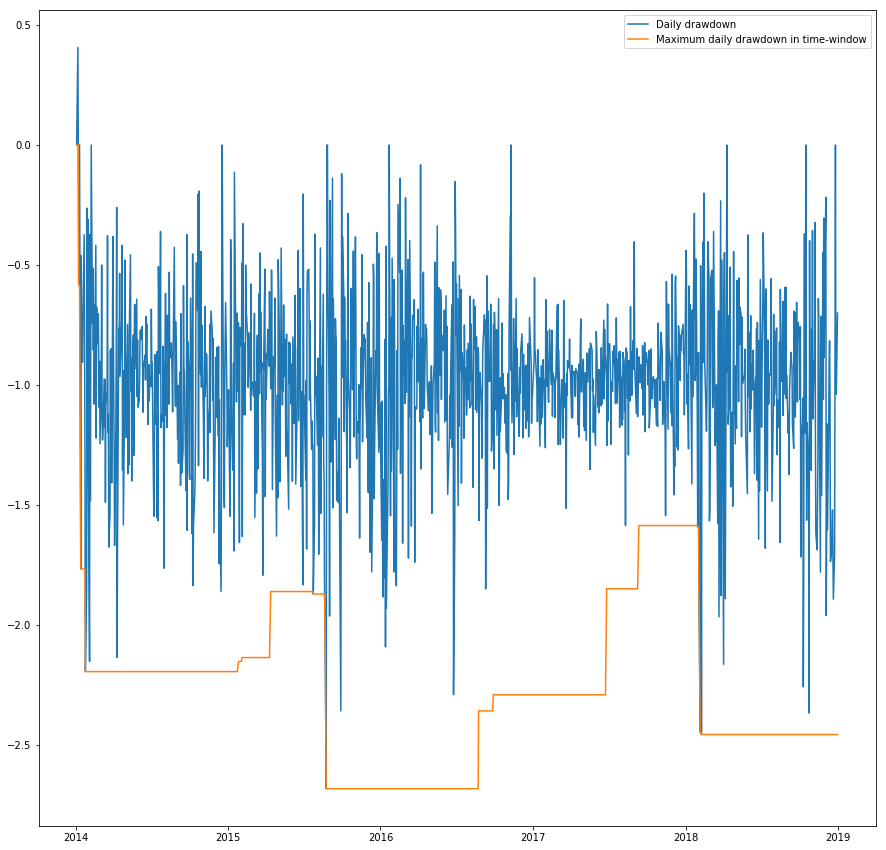

In [28]:
# Calculate the max value 
roll_max = returns['Portfolio'].rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = returns['Portfolio']/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,15))
plt.plot(returns.index, daily_draw_down, label='Daily drawdown')
plt.plot(returns.index, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()

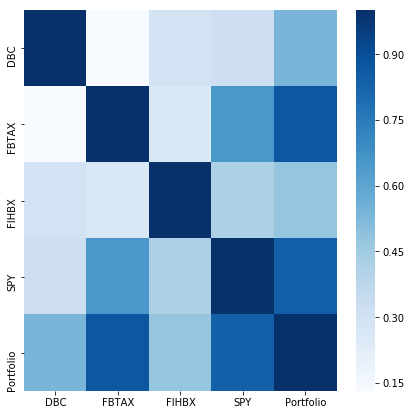

In [29]:
plt.figure(figsize=(7,7))
corr = returns.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Blues")

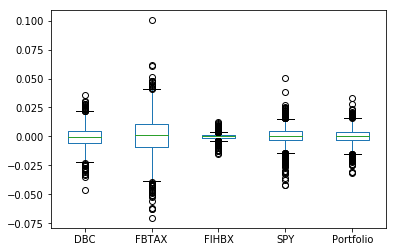

In [30]:
# Box plot
returns.plot(kind='box')

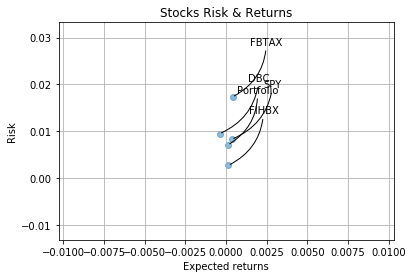

In [31]:
rets = returns.dropna()

plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

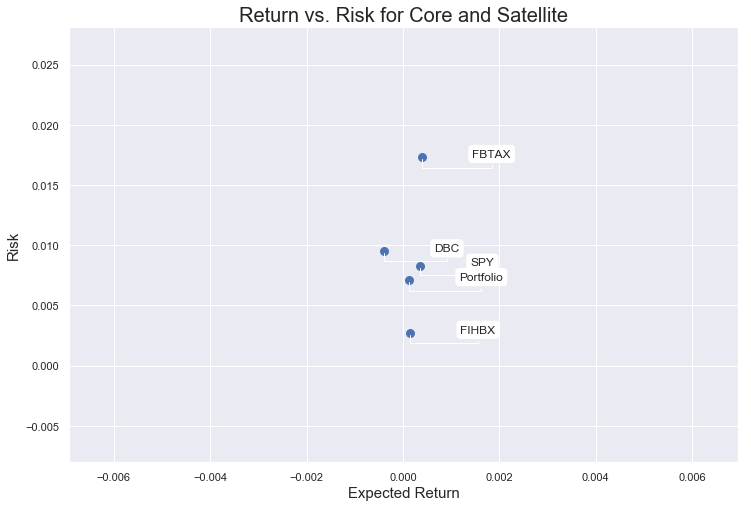

In [32]:
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Core and Satellite", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [33]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risk:")
print(rets.std())

Stock returns: 
DBC         -0.000388
FBTAX        0.000403
FIHBX        0.000155
SPY          0.000362
Portfolio    0.000133
dtype: float64
--------------------------------------------------
Stock risk:
DBC          0.009496
FBTAX        0.017337
FIHBX        0.002734
SPY          0.008306
Portfolio    0.007110
dtype: float64


In [34]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
DBC,-0.000388,0.009496
Portfolio,0.000133,0.007110
FIHBX,0.000155,0.002734
SPY,0.000362,0.008306
FBTAX,0.000403,0.017337


In [35]:
table.sort_values(by='Risk')

,Returns,Risk
FIHBX,0.000155,0.002734
Portfolio,0.000133,0.007110
SPY,0.000362,0.008306
DBC,-0.000388,0.009496
FBTAX,0.000403,0.017337
